# 05. Time Series Regression and Classification
- Time Series 데이터의 특징을 반영하여 Regression으로 Target 변수인 **5일 후(t+5시점) 지수종가**를 예측하고 t시점의 지수종가와 비교하여 Classification 문제로 반환한다.

## 2. LSTM Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from encodings import euc_kr
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from keras.utils import to_categorical

np.random.seed(777)

Using TensorFlow backend.


In [25]:
final = pd.read_csv('./final_merge.csv',encoding = 'euc-kr')
kospi = pd.read_csv('./data/kospi_국면분석.csv',encoding = 'euc-kr')
final_eco = pd.read_csv('./f_with_e2.csv',encoding = 'euc-kr')

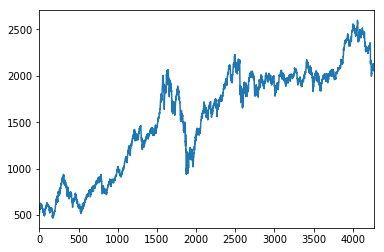

In [21]:
final_eco['지수종가'].plot()

In [ ]:
#지수만 있는 버전
kospi_add = kospi[['날짜','지수시가','지수저가','지수고가']]

In [26]:
Final = final_eco.merge(kospi_add,how = 'left',on = '날짜')
Final.head()

,날짜,지수종가,거래대금,상장주식수,시가총액,외국인보유주식수,외국인보유시가총액,신용거래종목수,신용자료일자,회사수,...,제조업내수출하지수(원지수),제조업생산-제조업,제조업생산출하-제조업,코스피지수(1980.1.4=100)(선행),필라델피아연준지수[미국],후행종합지수(2015=100),Y,지수시가,지수저가,지수고가
0,2001-01-02,520.95,1223328,19638887,191252891,2723222,58238292,746.0,20010102.0,704,...,64.962,48.36,51.915,551.8,-36.2,54.7,상승,503.31,500.97,521.34
1,2001-01-03,521.43,1583403,19633559,191363161,2727918,58249739,746.0,20010102.0,704,...,64.962,48.36,51.915,551.8,-36.2,54.7,상승,512.74,510.70,524.58
2,2001-01-04,558.02,2984761,19634734,204074166,2735566,62823637,746.0,20010102.0,704,...,64.962,48.36,51.915,551.8,-36.2,54.7,상승,551.53,550.91,567.16
3,2001-01-05,580.85,3569582,19637038,212089180,2747453,65820417,746.0,20010103.0,704,...,64.962,48.36,51.915,551.8,-36.2,54.7,상승,559.54,555.40,581.41
4,2001-01-08,586.65,2948092,19630735,214231273,2751599,66348238,746.0,20010104.0,704,...,64.962,48.36,51.915,551.8,-36.2,54.7,상승,573.72,572.48,587.91


In [31]:
final_eco = final.drop(['Unnamed: 0','Y'],axis = 1)
final_eco['5일후 지수종가'] = final_eco['지수종가'].shift(-5)
final_eco.head()

,날짜,지수종가,거래대금,상장주식수,시가총액,외국인보유주식수,외국인보유시가총액,신용거래종목수,신용자료일자,회사수,...,금속,oil,미국n년,국고채권(n년),USD,EUR,CNY,JPY,GBP,5일후 지수종가
0,2001-01-02,520.95,1223328,19638887,191252891,2723222,58238292,746.0,20010102.0,704,...,7202.5,25.8,8.5,11.9,1259.7,1185.38,152.19,1099.07,1885.02,589.92
1,2001-01-03,521.43,1583403,19633559,191363161,2727918,58249739,746.0,20010102.0,704,...,6641.3,26.5,8.6,11.8,1267.8,1205.49,153.15,1108.07,1903.35,560.81
2,2001-01-04,558.02,2984761,19634734,204074166,2735566,62823637,746.0,20010102.0,704,...,6843.0,26.8,8.3,11.4,1285.4,1193.24,155.29,1128.53,1914.15,561.79
3,2001-01-05,580.85,3569582,19637038,212089180,2747453,65820417,746.0,20010103.0,704,...,6878.7,26.6,8.0,11.0,1249.3,1190.90,150.92,1078.01,1876.82,587.87
4,2001-01-08,586.65,2948092,19630735,214231273,2751599,66348238,746.0,20010104.0,704,...,7012.1,25.8,8.0,10.9,1267.8,1215.06,153.16,1088.71,1906.33,599.00


In [ ]:
#Final[Final['날짜']=='2017-01-02'] # 3802까지

In [4]:
### economic있는 버전 잠시만 안녕

#data1 = final.merge(kospi_add,how = 'left',on = '날짜')
#data1 = data1.drop(['Unnamed: 0','Y'],axis = 1)
#data1 = Final.drop(['Y'],axis = 1)

#after5 = data1[['지수종가']].shift(-5);
#after5.columns = ['5일후 지수종가']
#data1 = pd.concat([after5,data1],axis = 1)
#data1.head()

,5일후 지수종가,날짜,지수종가,거래대금,상장주식수,시가총액,외국인보유주식수,외국인보유시가총액,신용거래종목수,신용자료일자,...,미국n년,국고채권(n년),USD,EUR,CNY,JPY,GBP,지수시가,지수저가,지수고가
0,589.92,2001-01-02,520.95,1223328,19638887,191252891,2723222,58238292,746.0,20010102.0,...,8.5,11.9,1259.7,1185.38,152.19,1099.07,1885.02,503.31,500.97,521.34
1,560.81,2001-01-03,521.43,1583403,19633559,191363161,2727918,58249739,746.0,20010102.0,...,8.6,11.8,1267.8,1205.49,153.15,1108.07,1903.35,512.74,510.70,524.58
2,561.79,2001-01-04,558.02,2984761,19634734,204074166,2735566,62823637,746.0,20010102.0,...,8.3,11.4,1285.4,1193.24,155.29,1128.53,1914.15,551.53,550.91,567.16
3,587.87,2001-01-05,580.85,3569582,19637038,212089180,2747453,65820417,746.0,20010103.0,...,8.0,11.0,1249.3,1190.90,150.92,1078.01,1876.82,559.54,555.40,581.41
4,599.00,2001-01-08,586.65,2948092,19630735,214231273,2751599,66348238,746.0,20010104.0,...,8.0,10.9,1267.8,1215.06,153.16,1088.71,1906.33,573.72,572.48,587.91


In [5]:
data1[data1['날짜']=='2017-01-02'] # 3962

,5일후 지수종가,날짜,지수종가,거래대금,상장주식수,시가총액,외국인보유주식수,외국인보유시가총액,신용거래종목수,신용자료일자,...,미국n년,국고채권(n년),USD,EUR,CNY,JPY,GBP,지수시가,지수저가,지수고가
3962,2048.78,2017-01-02,2026.16,2616791,41066327,1308042051,6662839,461306526,1282.0,20161228.0,...,2.5,3.1,1208.5,1272.37,173.26,1034.45,1492.2,2022.23,2015.68,2031.79


In [638]:
data1.shape ##economic 불포함 (4449,44) ##economic 포함(4276,96)

(4449, 43)

# 지수종가(not 5일후)를 기준으로 LSTM

In [32]:
# '날짜' 변수를 datetime 타입으로 변환하고 index로 사용하기
# 잠시만 안녕
#data1['날짜'] = pd.to_datetime(data1['날짜'],format = '%Y/%m/%d')
#col_name = data1.drop('날짜',axis = 1).columns
#data = data1.set_index('날짜').dropna()
#values = data.values #dataframe형태를 array로 변환한 ver.

final_eco['날짜'] = pd.to_datetime(final_eco['날짜'],format = '%Y/%m/%d')
col_name = final_eco.drop('날짜',axis = 1).columns
data = final_eco.set_index('날짜').dropna()
values = data.values #dataframe형태를 array로 변환한 ver.

In [7]:
data.shape ##economic 불포함(4444,42) ##economic 포함(4276,95)

(4444, 42)

In [33]:
# scaling - minmax
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
data_scaled = scaler.fit_transform(values)
data_scaled = pd.DataFrame(data_scaled,columns = col_name)
print(data_scaled.shape) ##(4276,95)
values = data_scaled.values
print(values.shape) ##(4276,95)

(4444, 39)
(4444, 39)


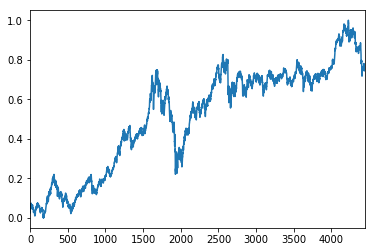

In [34]:
data_scaled.iloc[:,0].plot()

(3962, 1, 38) (3962, 1)
(482, 1, 38) (482, 1)


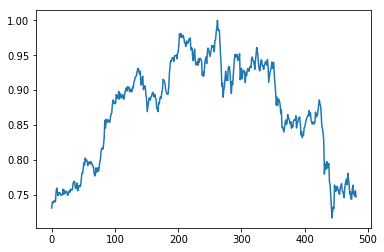

In [35]:
# train / test 나누기
#data[data['날짜']=='2017-01-02'] #3962
#values = reframed.values #(4443, 78) 
#print(values.shape)
train_frame = values[:3962,:] ##불포함 3802
test_frame = values[3962:,:]

# array로 변환
#train = train_frame.values
#test = test_frame.values

# 데이터셋 생성
#look_back = 100

#trainX, trainY = build_dataset(train_frame, seq_length)
#testX, testY = build_dataset(train_frame, seq_length)

train_X, train_y = train_frame[:, 1:], train_frame[:, 0] # (3802,1,94) (3802,1)
test_X, test_y = test_frame[:, 1:], test_frame[:, 0] # (474,1,94) (474,1)

# 3차원으로 변환(LSTM input 형식에 맞추기)
train_X = train_X.reshape(train_X.shape[0],1,train_X.shape[1])
train_y = train_y.reshape(train_y.shape[0],1)
test_X = test_X.reshape(test_X.shape[0],1,test_X.shape[1])
test_y = test_y.reshape(test_y.shape[0],1)
print(train_X.shape,train_y.shape) # (3802,1,94) (3802,1)
print(test_X.shape,test_y.shape) # (474,1,94) (474,1)
plt.plot(test_y)

### (1) batch_size = 140 / iterations = 1000 / hidden layers = 30 / activation = tanh(default)

In [41]:
seq_length = train_X.shape[0] ;print(seq_length) ##3802
data_dim = train_X.shape[2]; print(data_dim) ##94
output_dim = train_y.shape[1]; print(output_dim) ##1
batch_size = 140 ; print(batch_size) ##14
iterations = 1000

3962
38
1
140


In [42]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32,[None,None, data_dim])
Y = tf.placeholder(tf.float32,[None,None])
#print(X.shape,Y.shape)


cell = tf.contrib.rnn.BasicLSTMCell(num_units = 30, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell,X,dtype = tf.float32) ; print(outputs,_states)
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn = None)

loss = tf.reduce_sum(tf.square(Y_pred - Y))

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

m = tf.keras.metrics.Accuracy()

# RMSE
targets = tf.placeholder(tf.float32, [None,1])
predictions = tf.placeholder(tf.float32, [None,1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

#model = Sequential()
#model.add(LSTM(30, input_shape=(train_X.shape[1], 5)))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')

Tensor("rnn/transpose_1:0", shape=(?, ?, 30), dtype=float32) LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 30) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 30) dtype=float32>)


[step: 0] loss: 1395.6588134765625
[step: 50] loss: 6.073833465576172
[step: 100] loss: 2.785228967666626
[step: 150] loss: 1.9856939315795898
[step: 200] loss: 1.6788686513900757
[step: 250] loss: 1.4936895370483398
[step: 300] loss: 1.3377670049667358
[step: 350] loss: 1.1958119869232178
[step: 400] loss: 1.06536066532135
[step: 450] loss: 0.9456774592399597
[step: 500] loss: 0.8364807963371277
[step: 550] loss: 0.7377564907073975
[step: 600] loss: 0.6497132182121277
[step: 650] loss: 0.572748601436615
[step: 700] loss: 0.507307767868042
[step: 750] loss: 0.4534953832626343
[step: 800] loss: 0.41051504015922546
[step: 850] loss: 0.3764703869819641
[step: 900] loss: 0.34890034794807434
[step: 950] loss: 0.32560011744499207
RMSE: 0.026203051209449768


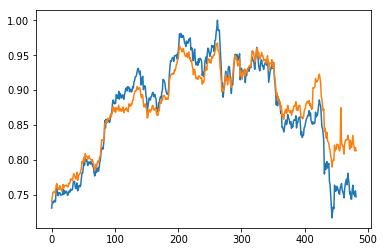

In [43]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: train_X, Y: train_y})
        train_predict = sess.run(Y_pred, feed_dict={X: train_X})
        m.update_state(train_y, train_predict)

        if i%50==0:
            print("[step: {}] loss: {}".format(i, step_loss,))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: test_X})
    rmse_val = sess.run(rmse, feed_dict={targets: test_y, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(test_y)
    plt.plot(test_predict)
    plt.show()

In [44]:
test_y.shape ##(482,1)
test_y.dtype ##float64
test_predict.shape ##(482,1)
test_predict.dtype ##float32

#### 절대 다시 돌리지 말 것 ####
pred_LSTM_1 = test_predict

In [46]:
test_kospi = test_frame[:, 0].reshape(test_frame.shape[0],1)
test_kospi.shape

(482, 1)

In [107]:
diff = pred_LSTM_1 - test_kospi #5일후 예측값 - t시점 지수종가
prediction = diff >= 0 #True면 '상승' = 1 False면 '하락' = 0

Y = kospi[['Y']]
true = Y.iloc[3962:-5,0].values
true = (true=='상승') #True면  1 = '상승' False면 0 = '하락'


from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("accuracy: {}  \nconfusion matrix:\n {}\nf1: {}".format(accuracy_score(true, prediction), confusion_matrix(true, prediction), f1_score(true, prediction)))

accuracy: 0.524896265560166  
confusion matrix:
 [[ 97 117]
 [112 156]]
f1: 0.5767097966728282


### (2) batch_size = 140 / iterations = 1000 / hidden layers = 30 / activation = ReLU

In [48]:
seq_length = train_X.shape[0] ;print(seq_length) ##3802
data_dim = train_X.shape[2]; print(data_dim) ##94
output_dim = train_y.shape[1]; print(output_dim) ##1
batch_size = 140 ; print(batch_size) ##14
iterations = 1000

3962
38
1
140


In [49]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32,[None,None, data_dim])
Y = tf.placeholder(tf.float32,[None,None])
#print(X.shape,Y.shape)


cell = tf.contrib.rnn.BasicLSTMCell(num_units = 30, state_is_tuple=True,activation = tf.nn.relu)
outputs, _states = tf.nn.dynamic_rnn(cell,X,dtype = tf.float32) ; print(outputs,_states)
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn = None)

loss = tf.reduce_sum(tf.square(Y_pred - Y))

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

m = tf.keras.metrics.Accuracy()

# RMSE
targets = tf.placeholder(tf.float32, [None,1])
predictions = tf.placeholder(tf.float32, [None,1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

#model = Sequential()
#model.add(LSTM(30, input_shape=(train_X.shape[1], 5)))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')

Tensor("rnn/transpose_1:0", shape=(?, ?, 30), dtype=float32) LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 30) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 30) dtype=float32>)


[step: 0] loss: 1412.991943359375
[step: 50] loss: 7.893426895141602
[step: 100] loss: 2.8894591331481934
[step: 150] loss: 2.234416961669922
[step: 200] loss: 1.8576573133468628
[step: 250] loss: 1.5902167558670044
[step: 300] loss: 1.3830490112304688
[step: 350] loss: 1.2148767709732056
[step: 400] loss: 1.0763722658157349
[step: 450] loss: 0.9619678258895874
[step: 500] loss: 0.8669538497924805
[step: 550] loss: 0.7875770330429077
[step: 600] loss: 0.7206334471702576
[step: 650] loss: 0.6634920835494995
[step: 700] loss: 0.6139516830444336
[step: 750] loss: 0.5705193281173706
[step: 800] loss: 0.5320711731910706
[step: 850] loss: 0.49788349866867065
[step: 900] loss: 0.4673909544944763
[step: 950] loss: 0.43998217582702637
RMSE: 0.11641295999288559


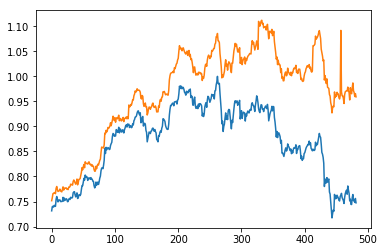

In [50]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: train_X, Y: train_y})
        train_predict = sess.run(Y_pred, feed_dict={X: train_X})
        m.update_state(train_y, train_predict)

        if i%50==0:
            print("[step: {}] loss: {}".format(i, step_loss,))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: test_X})
    rmse_val = sess.run(rmse, feed_dict={targets: test_y, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(test_y)
    plt.plot(test_predict)
    plt.show()

In [51]:
test_y.shape ##(482,1)
test_y.dtype ##float64
test_predict.shape ##(482,1)
test_predict.dtype ##float32

#### 절대 다시 돌리지 말 것 ####
pred_LSTM_2 = test_predict

In [108]:
diff = pred_LSTM_2 - test_kospi #5일후 예측값 - t시점 지수종가
prediction = diff >= 0 #True면 '상승' = 1 False면 '하락' = 0

Y = kospi[['Y']]
true = Y.iloc[3962:-5,0].values
true = (true=='상승') #True면  1 = '상승' False면 0 = '하락'


from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("accuracy: {}  \nconfusion matrix:\n {}\nf1: {}".format(accuracy_score(true, prediction), confusion_matrix(true, prediction), f1_score(true, prediction)))

accuracy: 0.5560165975103735  
confusion matrix:
 [[  0 214]
 [  0 268]]
f1: 0.7146666666666667


### (3) batch_size = 200 / iterations = 1500 / hidden layers = 35 / activation = tanh(default)

In [53]:
seq_length = train_X.shape[0] ;print(seq_length) ##3802
data_dim = train_X.shape[2]; print(data_dim) ##94
output_dim = train_y.shape[1]; print(output_dim) ##1
batch_size = 200 ; print(batch_size) ##14
iterations = 1500

3962
38
1
200


In [54]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32,[None,None, data_dim])
Y = tf.placeholder(tf.float32,[None,None])
#print(X.shape,Y.shape)


cell = tf.contrib.rnn.BasicLSTMCell(num_units = 35, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell,X,dtype = tf.float32) ; print(outputs,_states)
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn = None)

loss = tf.reduce_sum(tf.square(Y_pred - Y))

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

m = tf.keras.metrics.Accuracy()

# RMSE
targets = tf.placeholder(tf.float32, [None,1])
predictions = tf.placeholder(tf.float32, [None,1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

#model = Sequential()
#model.add(LSTM(30, input_shape=(train_X.shape[1], 5)))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')

Tensor("rnn/transpose_1:0", shape=(?, ?, 35), dtype=float32) LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 35) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 35) dtype=float32>)


[step: 0] loss: 755.5611572265625
[step: 50] loss: 4.349727630615234
[step: 100] loss: 1.9850351810455322
[step: 150] loss: 1.6734788417816162
[step: 200] loss: 1.4758141040802002
[step: 250] loss: 1.3011658191680908
[step: 300] loss: 1.1414673328399658
[step: 350] loss: 0.9962743520736694
[step: 400] loss: 0.866395890712738
[step: 450] loss: 0.7526788115501404
[step: 500] loss: 0.655476450920105
[step: 550] loss: 0.5743290185928345
[step: 600] loss: 0.5078093409538269
[step: 650] loss: 0.45338186621665955
[step: 700] loss: 0.4079197645187378
[step: 750] loss: 0.36865201592445374
[step: 800] loss: 0.33384475111961365
[step: 850] loss: 0.3028011918067932
[step: 900] loss: 0.27541089057922363
[step: 950] loss: 0.2515074908733368
[step: 1000] loss: 0.23024581372737885
[step: 1050] loss: 0.21032270789146423
[step: 1100] loss: 0.19994346797466278
[step: 1150] loss: 0.18094541132450104
[step: 1200] loss: 0.16460303962230682
[step: 1250] loss: 0.1909344345331192
[step: 1300] loss: 0.146501079

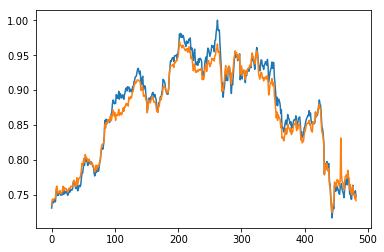

In [55]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: train_X, Y: train_y})
        train_predict = sess.run(Y_pred, feed_dict={X: train_X})
        m.update_state(train_y, train_predict)

        if i%50==0:
            print("[step: {}] loss: {}".format(i, step_loss,))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: test_X})
    rmse_val = sess.run(rmse, feed_dict={targets: test_y, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(test_y)
    plt.plot(test_predict)
    plt.show()

In [56]:
test_y.shape ##(482,1)
test_y.dtype ##float64
test_predict.shape ##(482,1)
test_predict.dtype ##float32

#### 절대 다시 돌리지 말 것 ####
pred_LSTM_3 = test_predict

In [109]:
diff = pred_LSTM_3 - test_kospi #5일후 예측값 - t시점 지수종가
prediction = diff >= 0 #True면 '상승' = 1 False면 '하락' = 0

Y = kospi[['Y']]
true = Y.iloc[3962:-5,0].values
true = (true=='상승') #True면  1 = '상승' False면 0 = '하락'


from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("accuracy: {}  \nconfusion matrix:\n {}\nf1: {}".format(accuracy_score(true, prediction), confusion_matrix(true, prediction), f1_score(true, prediction)))

accuracy: 0.5871369294605809  
confusion matrix:
 [[157  57]
 [142 126]]
f1: 0.5587583148558758


### (4) batch_size = 200 / iterations = 2000 / hidden layers = 40 / activation = tanh(default)

In [58]:
seq_length = train_X.shape[0] ;print(seq_length) ##3802
data_dim = train_X.shape[2]; print(data_dim) ##94
output_dim = train_y.shape[1]; print(output_dim) ##1
batch_size = 200 ; print(batch_size) ##14
iterations = 2000

3962
38
1
200


In [59]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32,[None,None, data_dim])
Y = tf.placeholder(tf.float32,[None,None])
#print(X.shape,Y.shape)


cell = tf.contrib.rnn.BasicLSTMCell(num_units = 40, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell,X,dtype = tf.float32) ; print(outputs,_states)
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn = None)

loss = tf.reduce_sum(tf.square(Y_pred - Y))

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

m = tf.keras.metrics.Accuracy()

# RMSE
targets = tf.placeholder(tf.float32, [None,1])
predictions = tf.placeholder(tf.float32, [None,1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

#model = Sequential()
#model.add(LSTM(30, input_shape=(train_X.shape[1], 5)))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')

Tensor("rnn/transpose_1:0", shape=(?, ?, 40), dtype=float32) LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 40) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 40) dtype=float32>)


[step: 0] loss: 1440.376708984375
[step: 50] loss: 7.801795482635498
[step: 100] loss: 2.6697537899017334
[step: 150] loss: 1.9405020475387573
[step: 200] loss: 1.6467480659484863
[step: 250] loss: 1.4615341424942017
[step: 300] loss: 1.3117237091064453
[step: 350] loss: 1.1789737939834595
[step: 400] loss: 1.0572679042816162
[step: 450] loss: 0.9448147416114807
[step: 500] loss: 0.8414453268051147
[step: 550] loss: 0.7474697232246399
[step: 600] loss: 0.663199245929718
[step: 650] loss: 0.5887241363525391
[step: 700] loss: 0.5237996578216553
[step: 750] loss: 0.46783483028411865
[step: 800] loss: 0.4199369251728058
[step: 850] loss: 0.3789353370666504
[step: 900] loss: 0.34342828392982483
[step: 950] loss: 0.3120034635066986
[step: 1000] loss: 0.2835250794887543
[step: 1050] loss: 0.25723621249198914
[step: 1100] loss: 0.28715598583221436
[step: 1150] loss: 0.22431424260139465
[step: 1200] loss: 0.20395967364311218
[step: 1250] loss: 0.18817530572414398
[step: 1300] loss: 0.2463145703

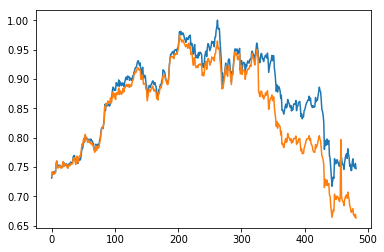

In [60]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: train_X, Y: train_y})
        train_predict = sess.run(Y_pred, feed_dict={X: train_X})
        m.update_state(train_y, train_predict)

        if i%50==0:
            print("[step: {}] loss: {}".format(i, step_loss,))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: test_X})
    rmse_val = sess.run(rmse, feed_dict={targets: test_y, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(test_y)
    plt.plot(test_predict)
    plt.show()

In [62]:
test_y.shape ##(482,1)
test_y.dtype ##float64
test_predict.shape ##(482,1)
test_predict.dtype ##float32

#### 절대 다시 돌리지 말 것 ####
pred_LSTM_4 = test_predict

In [110]:
diff = pred_LSTM_4 - test_kospi #5일후 예측값 - t시점 지수종가
prediction = diff >= 0 #True면 '상승' = 1 False면 '하락' = 0

Y = kospi[['Y']]
true = Y.iloc[3962:-5,0].values
true = (true=='상승') #True면  1 = '상승' False면 0 = '하락'


from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("accuracy: {}  \nconfusion matrix:\n {}\nf1: {}".format(accuracy_score(true, prediction), confusion_matrix(true, prediction), f1_score(true, prediction)))

accuracy: 0.47925311203319504  
confusion matrix:
 [[203  11]
 [240  28]]
f1: 0.18241042345276876


### (5) batch_size = 200 / iterations = 1500 / hidden layers = 40 / activation = tanh(default)

In [64]:
seq_length = train_X.shape[0] ;print(seq_length) ##3802
data_dim = train_X.shape[2]; print(data_dim) ##94
output_dim = train_y.shape[1]; print(output_dim) ##1
batch_size = 200 ; print(batch_size) ##14
iterations = 1500

3962
38
1
200


In [65]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32,[None,None, data_dim])
Y = tf.placeholder(tf.float32,[None,None])
#print(X.shape,Y.shape)


cell = tf.contrib.rnn.BasicLSTMCell(num_units = 40, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell,X,dtype = tf.float32) ; print(outputs,_states)
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn = None)

loss = tf.reduce_sum(tf.square(Y_pred - Y))

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

m = tf.keras.metrics.Accuracy()

# RMSE
targets = tf.placeholder(tf.float32, [None,1])
predictions = tf.placeholder(tf.float32, [None,1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

#model = Sequential()
#model.add(LSTM(30, input_shape=(train_X.shape[1], 5)))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')

Tensor("rnn/transpose_1:0", shape=(?, ?, 40), dtype=float32) LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 40) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 40) dtype=float32>)


[step: 0] loss: 783.4949340820312
[step: 50] loss: 3.923402786254883
[step: 100] loss: 1.8928979635238647
[step: 150] loss: 1.5124669075012207
[step: 200] loss: 1.291242241859436
[step: 250] loss: 1.112927794456482
[step: 300] loss: 0.9594433903694153
[step: 350] loss: 0.825990617275238
[step: 400] loss: 0.7111702561378479
[step: 450] loss: 0.6141239404678345
[step: 500] loss: 0.5337358117103577
[step: 550] loss: 0.46845710277557373
[step: 600] loss: 0.4163110852241516
[step: 650] loss: 0.3749951124191284
[step: 700] loss: 0.342098206281662
[step: 750] loss: 0.3153957724571228
[step: 800] loss: 0.29308396577835083
[step: 850] loss: 0.2738552987575531
[step: 900] loss: 0.256833553314209
[step: 950] loss: 0.2414526790380478
[step: 1000] loss: 0.22734084725379944
[step: 1050] loss: 0.2142373025417328
[step: 1100] loss: 0.2019452154636383
[step: 1150] loss: 0.19030866026878357
[step: 1200] loss: 0.1792066991329193
[step: 1250] loss: 0.16855081915855408
[step: 1300] loss: 0.1582853645086288

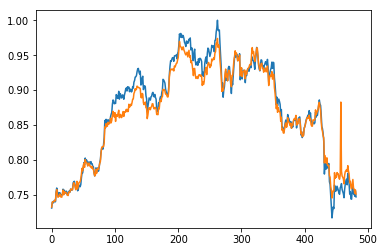

In [66]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: train_X, Y: train_y})
        train_predict = sess.run(Y_pred, feed_dict={X: train_X})
        m.update_state(train_y, train_predict)

        if i%50==0:
            print("[step: {}] loss: {}".format(i, step_loss,))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: test_X})
    rmse_val = sess.run(rmse, feed_dict={targets: test_y, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(test_y)
    plt.plot(test_predict)
    plt.show()

In [67]:
test_y.shape ##(482,1)
test_y.dtype ##float64
test_predict.shape ##(482,1)
test_predict.dtype ##float32

#### 절대 다시 돌리지 말 것 ####
pred_LSTM_5 = test_predict

In [111]:
diff = pred_LSTM_5 - test_kospi #5일후 예측값 - t시점 지수종가
prediction = diff >= 0 #True면 '상승' = 1 False면 '하락' = 0

Y = kospi[['Y']]
true = Y.iloc[3962:-5,0].values
true = (true=='상승') #True면  1 = '상승' False면 0 = '하락'


from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("accuracy: {}  \nconfusion matrix:\n {}\nf1: {}".format(accuracy_score(true, prediction), confusion_matrix(true, prediction), f1_score(true, prediction)))

accuracy: 0.5477178423236515  
confusion matrix:
 [[165  49]
 [169  99]]
f1: 0.4759615384615385


### (6) batch_size = 200 / iterations = 1500 / hidden layers = 30 / activation = tanh(default)

In [69]:
seq_length = train_X.shape[0] ;print(seq_length) ##3802
data_dim = train_X.shape[2]; print(data_dim) ##94
output_dim = train_y.shape[1]; print(output_dim) ##1
batch_size = 200 ; print(batch_size) ##14
iterations = 1500

3962
38
1
200


In [70]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32,[None,None, data_dim])
Y = tf.placeholder(tf.float32,[None,None])
#print(X.shape,Y.shape)


cell = tf.contrib.rnn.BasicLSTMCell(num_units = 30, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell,X,dtype = tf.float32) ; print(outputs,_states)
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn = None)

loss = tf.reduce_sum(tf.square(Y_pred - Y))

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

m = tf.keras.metrics.Accuracy()

# RMSE
targets = tf.placeholder(tf.float32, [None,1])
predictions = tf.placeholder(tf.float32, [None,1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

#model = Sequential()
#model.add(LSTM(30, input_shape=(train_X.shape[1], 5)))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')

Tensor("rnn/transpose_1:0", shape=(?, ?, 30), dtype=float32) LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 30) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 30) dtype=float32>)


[step: 0] loss: 759.80126953125
[step: 50] loss: 4.404906272888184
[step: 100] loss: 1.821898102760315
[step: 150] loss: 1.484595775604248
[step: 200] loss: 1.3051695823669434
[step: 250] loss: 1.1545382738113403
[step: 300] loss: 1.0198215246200562
[step: 350] loss: 0.8987926840782166
[step: 400] loss: 0.7912881970405579
[step: 450] loss: 0.6975024342536926
[step: 500] loss: 0.6173120141029358
[step: 550] loss: 0.5500668883323669
[step: 600] loss: 0.49458399415016174
[step: 650] loss: 0.44925662875175476
[step: 700] loss: 0.41224557161331177
[step: 750] loss: 0.3817107379436493
[step: 800] loss: 0.3560125231742859
[step: 850] loss: 0.3338300287723541
[step: 900] loss: 0.3141854405403137
[step: 950] loss: 0.296399861574173
[step: 1000] loss: 0.28002026677131653
[step: 1050] loss: 0.2647498548030853
[step: 1100] loss: 0.2503921091556549
[step: 1150] loss: 0.23681455850601196
[step: 1200] loss: 0.22392424941062927
[step: 1250] loss: 0.21165448427200317
[step: 1300] loss: 0.19995591044425

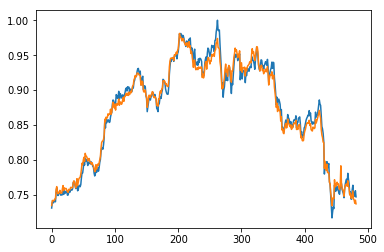

In [71]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: train_X, Y: train_y})
        train_predict = sess.run(Y_pred, feed_dict={X: train_X})
        m.update_state(train_y, train_predict)

        if i%50==0:
            print("[step: {}] loss: {}".format(i, step_loss,))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: test_X})
    rmse_val = sess.run(rmse, feed_dict={targets: test_y, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(test_y)
    plt.plot(test_predict)
    plt.show()

In [72]:
test_y.shape ##(482,1)
test_y.dtype ##float64
test_predict.shape ##(482,1)
test_predict.dtype ##float32

#### 절대 다시 돌리지 말 것 ####
pred_LSTM_6 = test_predict

In [112]:
diff = pred_LSTM_6 - test_kospi #5일후 예측값 - t시점 지수종가
prediction = diff >= 0 #True면 '상승' = 1 False면 '하락' = 0

Y = kospi[['Y']]
true = Y.iloc[3962:-5,0].values
true = (true=='상승') #True면  1 = '상승' False면 0 = '하락'


from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("accuracy: {}  \nconfusion matrix:\n {}\nf1: {}".format(accuracy_score(true, prediction), confusion_matrix(true, prediction), f1_score(true, prediction)))

accuracy: 0.6452282157676349  
confusion matrix:
 [[146  68]
 [103 165]]
f1: 0.6586826347305389


### (7) batch_size = 200 / iterations = 1500 / hidden layers = 20 / activation = tanh(default)

In [74]:
seq_length = train_X.shape[0] ;print(seq_length) ##3802
data_dim = train_X.shape[2]; print(data_dim) ##94
output_dim = train_y.shape[1]; print(output_dim) ##1
batch_size = 200 ; print(batch_size) ##14
iterations = 1500

3962
38
1
200


In [75]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32,[None,None, data_dim])
Y = tf.placeholder(tf.float32,[None,None])
#print(X.shape,Y.shape)


cell = tf.contrib.rnn.BasicLSTMCell(num_units = 20, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell,X,dtype = tf.float32) ; print(outputs,_states)
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn = None)

loss = tf.reduce_sum(tf.square(Y_pred - Y))

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

m = tf.keras.metrics.Accuracy()

# RMSE
targets = tf.placeholder(tf.float32, [None,1])
predictions = tf.placeholder(tf.float32, [None,1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

#model = Sequential()
#model.add(LSTM(30, input_shape=(train_X.shape[1], 5)))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')

Tensor("rnn/transpose_1:0", shape=(?, ?, 20), dtype=float32) LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 20) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 20) dtype=float32>)


[step: 0] loss: 1172.122802734375
[step: 50] loss: 6.154399871826172
[step: 100] loss: 2.3604750633239746
[step: 150] loss: 1.7582319974899292
[step: 200] loss: 1.5118749141693115
[step: 250] loss: 1.3506321907043457
[step: 300] loss: 1.2116910219192505
[step: 350] loss: 1.0847455263137817
[step: 400] loss: 0.9684145450592041
[step: 450] loss: 0.8624370694160461
[step: 500] loss: 0.7667155265808105
[step: 550] loss: 0.6811647415161133
[step: 600] loss: 0.6056491136550903
[step: 650] loss: 0.5399206876754761
[step: 700] loss: 0.4835646152496338
[step: 750] loss: 0.435953825712204
[step: 800] loss: 0.39624089002609253
[step: 850] loss: 0.3634006083011627
[step: 900] loss: 0.3363131880760193
[step: 950] loss: 0.3138653635978699
[step: 1000] loss: 0.29503926634788513
[step: 1050] loss: 0.2789683938026428
[step: 1100] loss: 0.26495906710624695
[step: 1150] loss: 0.2524818181991577
[step: 1200] loss: 0.2411462962627411
[step: 1250] loss: 0.23067045211791992
[step: 1300] loss: 0.2208512723445

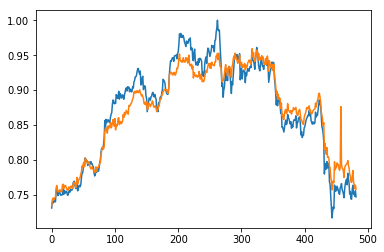

In [76]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: train_X, Y: train_y})
        train_predict = sess.run(Y_pred, feed_dict={X: train_X})
        m.update_state(train_y, train_predict)

        if i%50==0:
            print("[step: {}] loss: {}".format(i, step_loss,))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: test_X})
    rmse_val = sess.run(rmse, feed_dict={targets: test_y, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(test_y)
    plt.plot(test_predict)
    plt.show()

In [77]:
test_y.shape ##(482,1)
test_y.dtype ##float64
test_predict.shape ##(482,1)
test_predict.dtype ##float32

#### 절대 다시 돌리지 말 것 ####
pred_LSTM_7 = test_predict

In [113]:
diff = pred_LSTM_7 - test_kospi #5일후 예측값 - t시점 지수종가
prediction = diff >= 0 #True면 '상승' = 1 False면 '하락' = 0

Y = kospi[['Y']]
true = Y.iloc[3962:-5,0].values
true = (true=='상승') #True면  1 = '상승' False면 0 = '하락'


from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("accuracy: {}  \nconfusion matrix:\n {}\nf1: {}".format(accuracy_score(true, prediction), confusion_matrix(true, prediction), f1_score(true, prediction)))

accuracy: 0.549792531120332  
confusion matrix:
 [[108 106]
 [111 157]]
f1: 0.591337099811676


### (8) batch_size = 200 / iterations = 1500 / hidden layers = 25 / activation = tanh(default)

In [79]:
seq_length = train_X.shape[0] ;print(seq_length) ##3802
data_dim = train_X.shape[2]; print(data_dim) ##94
output_dim = train_y.shape[1]; print(output_dim) ##1
batch_size = 200 ; print(batch_size) ##14
iterations = 1500

3962
38
1
200


In [80]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32,[None,None, data_dim])
Y = tf.placeholder(tf.float32,[None,None])
#print(X.shape,Y.shape)


cell = tf.contrib.rnn.BasicLSTMCell(num_units = 25, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell,X,dtype = tf.float32) ; print(outputs,_states)
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn = None)

loss = tf.reduce_sum(tf.square(Y_pred - Y))

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

m = tf.keras.metrics.Accuracy()

# RMSE
targets = tf.placeholder(tf.float32, [None,1])
predictions = tf.placeholder(tf.float32, [None,1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

#model = Sequential()
#model.add(LSTM(30, input_shape=(train_X.shape[1], 5)))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')

Tensor("rnn/transpose_1:0", shape=(?, ?, 25), dtype=float32) LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 25) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 25) dtype=float32>)


[step: 0] loss: 1620.83642578125
[step: 50] loss: 6.669027805328369
[step: 100] loss: 2.743635654449463
[step: 150] loss: 1.8786728382110596
[step: 200] loss: 1.5700628757476807
[step: 250] loss: 1.3986234664916992
[step: 300] loss: 1.2625770568847656
[step: 350] loss: 1.1423618793487549
[step: 400] loss: 1.033303141593933
[step: 450] loss: 0.9337462186813354
[step: 500] loss: 0.8430811166763306
[step: 550] loss: 0.7610998749732971
[step: 600] loss: 0.6876798868179321
[step: 650] loss: 0.6226277947425842
[step: 700] loss: 0.5656102299690247
[step: 750] loss: 0.5161310434341431
[step: 800] loss: 0.47354111075401306
[step: 850] loss: 0.4370698928833008
[step: 900] loss: 0.40587741136550903
[step: 950] loss: 0.3791141211986542
[step: 1000] loss: 0.3559799790382385
[step: 1050] loss: 0.33576828241348267
[step: 1100] loss: 0.31789010763168335
[step: 1150] loss: 0.30187806487083435
[step: 1200] loss: 0.28737443685531616
[step: 1250] loss: 0.2741101384162903
[step: 1300] loss: 0.2618837952613

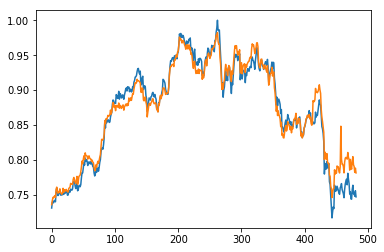

In [81]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: train_X, Y: train_y})
        train_predict = sess.run(Y_pred, feed_dict={X: train_X})
        m.update_state(train_y, train_predict)

        if i%50==0:
            print("[step: {}] loss: {}".format(i, step_loss,))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: test_X})
    rmse_val = sess.run(rmse, feed_dict={targets: test_y, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(test_y)
    plt.plot(test_predict)
    plt.show()

In [82]:
test_y.shape ##(482,1)
test_y.dtype ##float64
test_predict.shape ##(482,1)
test_predict.dtype ##float32

#### 절대 다시 돌리지 말 것 ####
pred_LSTM_8 = test_predict

In [114]:
diff = pred_LSTM_8 - test_kospi #5일후 예측값 - t시점 지수종가
prediction = diff >= 0 #True면 '상승' = 1 False면 '하락' = 0

Y = kospi[['Y']]
true = Y.iloc[3962:-5,0].values
true = (true=='상승') #True면  1 = '상승' False면 0 = '하락'


from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("accuracy: {}  \nconfusion matrix:\n {}\nf1: {}".format(accuracy_score(true, prediction), confusion_matrix(true, prediction), f1_score(true, prediction)))

accuracy: 0.553941908713693  
confusion matrix:
 [[115  99]
 [116 152]]
f1: 0.5857418111753372


### (9) batch_size = 200 / iterations = 2000 / hidden layers = 30 / activation = tanh(default)

In [92]:
seq_length = train_X.shape[0] ;print(seq_length) ##3802
data_dim = train_X.shape[2]; print(data_dim) ##94
output_dim = train_y.shape[1]; print(output_dim) ##1
batch_size = 200 ; print(batch_size) ##14
iterations = 2000

3962
38
1
200


In [93]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32,[None,None, data_dim])
Y = tf.placeholder(tf.float32,[None,None])
#print(X.shape,Y.shape)


cell = tf.contrib.rnn.BasicLSTMCell(num_units = 30, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell,X,dtype = tf.float32) ; print(outputs,_states)
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn = None)

loss = tf.reduce_sum(tf.square(Y_pred - Y))

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

m = tf.keras.metrics.Accuracy()

# RMSE
targets = tf.placeholder(tf.float32, [None,1])
predictions = tf.placeholder(tf.float32, [None,1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

#model = Sequential()
#model.add(LSTM(30, input_shape=(train_X.shape[1], 5)))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')

Tensor("rnn/transpose_1:0", shape=(?, ?, 30), dtype=float32) LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 30) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 30) dtype=float32>)


[step: 0] loss: 1036.802001953125
[step: 50] loss: 5.264055252075195
[step: 100] loss: 2.0949370861053467
[step: 150] loss: 1.6307003498077393
[step: 200] loss: 1.422591209411621
[step: 250] loss: 1.2699252367019653
[step: 300] loss: 1.1375415325164795
[step: 350] loss: 1.0176377296447754
[step: 400] loss: 0.9079801440238953
[step: 450] loss: 0.8085548281669617
[step: 500] loss: 0.720032811164856
[step: 550] loss: 0.642867922782898
[step: 600] loss: 0.5770179629325867
[step: 650] loss: 0.5217477083206177
[step: 700] loss: 0.4757114350795746
[step: 750] loss: 0.4371878504753113
[step: 800] loss: 0.4042854607105255
[step: 850] loss: 0.37531641125679016
[step: 900] loss: 0.3490692377090454
[step: 950] loss: 0.32478755712509155
[step: 1000] loss: 0.30200064182281494
[step: 1050] loss: 0.280348539352417
[step: 1100] loss: 0.2594684362411499
[step: 1150] loss: 0.23900848627090454
[step: 1200] loss: 0.21869736909866333
[step: 1250] loss: 0.20525167882442474
[step: 1300] loss: 0.18825946748256

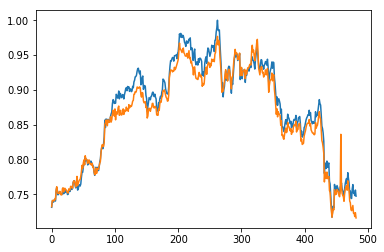

In [94]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: train_X, Y: train_y})
        train_predict = sess.run(Y_pred, feed_dict={X: train_X})
        m.update_state(train_y, train_predict)

        if i%50==0:
            print("[step: {}] loss: {}".format(i, step_loss,))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: test_X})
    rmse_val = sess.run(rmse, feed_dict={targets: test_y, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(test_y)
    plt.plot(test_predict)
    plt.show()

In [95]:
test_y.shape ##(482,1)
test_y.dtype ##float64
test_predict.shape ##(482,1)
test_predict.dtype ##float32

#### 절대 다시 돌리지 말 것 ####
pred_LSTM_9 = test_predict

In [115]:
diff = pred_LSTM_9 - test_kospi #5일후 예측값 - t시점 지수종가
prediction = diff >= 0 #True면 '상승' = 1 False면 '하락' = 0

Y = kospi[['Y']]
true = Y.iloc[3962:-5,0].values
true = (true=='상승') #True면  1 = '상승' False면 0 = '하락'


from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("accuracy: {}  \nconfusion matrix:\n {}\nf1: {}".format(accuracy_score(true, prediction), confusion_matrix(true, prediction), f1_score(true, prediction)))

accuracy: 0.529045643153527  
confusion matrix:
 [[181  33]
 [194  74]]
f1: 0.39466666666666667


### (10) batch_size = 150 / iterations = 1600 / hidden layers = 30 / activation = tanh(default)

In [97]:
seq_length = train_X.shape[0] ;print(seq_length) ##3802
data_dim = train_X.shape[2]; print(data_dim) ##94
output_dim = train_y.shape[1]; print(output_dim) ##1
batch_size = 150 ; print(batch_size) ##14
iterations = 1600

3962
38
1
150


In [98]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32,[None,None, data_dim])
Y = tf.placeholder(tf.float32,[None,None])
#print(X.shape,Y.shape)


cell = tf.contrib.rnn.BasicLSTMCell(num_units = 30, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell,X,dtype = tf.float32) ; print(outputs,_states)
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn = None)

loss = tf.reduce_sum(tf.square(Y_pred - Y))

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

m = tf.keras.metrics.Accuracy()

# RMSE
targets = tf.placeholder(tf.float32, [None,1])
predictions = tf.placeholder(tf.float32, [None,1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

#model = Sequential()
#model.add(LSTM(30, input_shape=(train_X.shape[1], 5)))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')

Tensor("rnn/transpose_1:0", shape=(?, ?, 30), dtype=float32) LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 30) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 30) dtype=float32>)


[step: 0] loss: 1068.273681640625
[step: 50] loss: 6.355178356170654
[step: 100] loss: 2.208543062210083
[step: 150] loss: 1.6305228471755981
[step: 200] loss: 1.3957462310791016
[step: 250] loss: 1.2217555046081543
[step: 300] loss: 1.0717308521270752
[step: 350] loss: 0.9392299652099609
[step: 400] loss: 0.8223027586936951
[step: 450] loss: 0.7204870581626892
[step: 500] loss: 0.63360595703125
[step: 550] loss: 0.5611096024513245
[step: 600] loss: 0.5017796754837036
[step: 650] loss: 0.4537677466869354
[step: 700] loss: 0.4148889183998108
[step: 750] loss: 0.3830021917819977
[step: 800] loss: 0.3562973737716675
[step: 850] loss: 0.3333973288536072
[step: 900] loss: 0.3133195638656616
[step: 950] loss: 0.29538020491600037
[step: 1000] loss: 0.27909770607948303
[step: 1050] loss: 0.2641257643699646
[step: 1100] loss: 0.25020864605903625
[step: 1150] loss: 0.237155944108963
[step: 1200] loss: 0.22482281923294067
[step: 1250] loss: 0.21309834718704224
[step: 1300] loss: 0.201894551515579

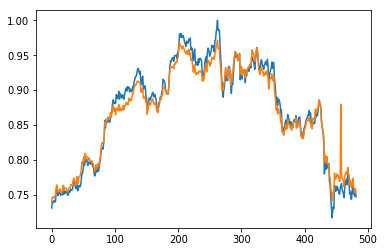

In [99]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: train_X, Y: train_y})
        train_predict = sess.run(Y_pred, feed_dict={X: train_X})
        m.update_state(train_y, train_predict)

        if i%50==0:
            print("[step: {}] loss: {}".format(i, step_loss,))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: test_X})
    rmse_val = sess.run(rmse, feed_dict={targets: test_y, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(test_y)
    plt.plot(test_predict)
    plt.show()

In [100]:
test_y.shape ##(482,1)
test_y.dtype ##float64
test_predict.shape ##(482,1)
test_predict.dtype ##float32

#### 절대 다시 돌리지 말 것 ####
pred_LSTM_10 = test_predict

In [116]:
diff = pred_LSTM_10 - test_kospi #5일후 예측값 - t시점 지수종가
prediction = diff >= 0 #True면 '상승' = 1 False면 '하락' = 0

Y = kospi[['Y']]
true = Y.iloc[3962:-5,0].values
true = (true=='상승') #True면  1 = '상승' False면 0 = '하락'


from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("accuracy: {}  \nconfusion matrix:\n {}\nf1: {}".format(accuracy_score(true, prediction), confusion_matrix(true, prediction), f1_score(true, prediction)))

accuracy: 0.5477178423236515  
confusion matrix:
 [[136  78]
 [140 128]]
f1: 0.540084388185654


### (11) batch_size = 200 / iterations = 1500 / hidden layers = 30 / activation = leaky-ReLU

In [102]:
seq_length = train_X.shape[0] ;print(seq_length) ##3802
data_dim = train_X.shape[2]; print(data_dim) ##94
output_dim = train_y.shape[1]; print(output_dim) ##1
batch_size = 200 ; print(batch_size) ##14
iterations = 1500

3962
38
1
200


In [103]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32,[None,None, data_dim])
Y = tf.placeholder(tf.float32,[None,None])
#print(X.shape,Y.shape)


cell = tf.contrib.rnn.BasicLSTMCell(num_units = 30, state_is_tuple=True,activation = tf.nn.leaky_relu)
outputs, _states = tf.nn.dynamic_rnn(cell,X,dtype = tf.float32) ; print(outputs,_states)
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn = None)

loss = tf.reduce_sum(tf.square(Y_pred - Y))

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

m = tf.keras.metrics.Accuracy()

# RMSE
targets = tf.placeholder(tf.float32, [None,1])
predictions = tf.placeholder(tf.float32, [None,1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

#model = Sequential()
#model.add(LSTM(30, input_shape=(train_X.shape[1], 5)))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')

Tensor("rnn/transpose_1:0", shape=(?, ?, 30), dtype=float32) LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 30) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 30) dtype=float32>)


[step: 0] loss: 1155.334716796875
[step: 50] loss: 4.685503959655762
[step: 100] loss: 2.6532838344573975
[step: 150] loss: 2.106590747833252
[step: 200] loss: 1.7470954656600952
[step: 250] loss: 1.4826465845108032
[step: 300] loss: 1.2794945240020752
[step: 350] loss: 1.112588882446289
[step: 400] loss: 0.9724291563034058
[step: 450] loss: 0.8525542616844177
[step: 500] loss: 0.7536240816116333
[step: 550] loss: 0.6724313497543335
[step: 600] loss: 0.6062623262405396
[step: 650] loss: 0.551572859287262
[step: 700] loss: 0.5068060755729675
[step: 750] loss: 0.469494491815567
[step: 800] loss: 0.43799376487731934
[step: 850] loss: 0.41115981340408325
[step: 900] loss: 0.38724157214164734
[step: 950] loss: 0.36551225185394287
[step: 1000] loss: 0.34736621379852295
[step: 1050] loss: 0.3310575485229492
[step: 1100] loss: 0.3162574768066406
[step: 1150] loss: 0.3025214672088623
[step: 1200] loss: 0.28946706652641296
[step: 1250] loss: 0.27690446376800537
[step: 1300] loss: 0.2631471157073

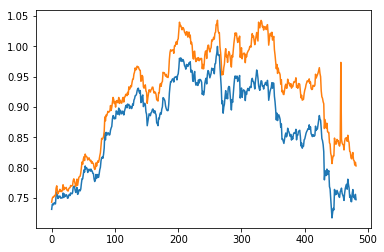

In [104]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: train_X, Y: train_y})
        train_predict = sess.run(Y_pred, feed_dict={X: train_X})
        m.update_state(train_y, train_predict)

        if i%50==0:
            print("[step: {}] loss: {}".format(i, step_loss,))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: test_X})
    rmse_val = sess.run(rmse, feed_dict={targets: test_y, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(test_y)
    plt.plot(test_predict)
    plt.show()

In [105]:
test_y.shape ##(482,1)
test_y.dtype ##float64
test_predict.shape ##(482,1)
test_predict.dtype ##float32

#### 절대 다시 돌리지 말 것 ####
pred_LSTM_11 = test_predict

In [117]:
diff = pred_LSTM_11 - test_kospi #5일후 예측값 - t시점 지수종가
prediction = diff >= 0 #True면 '상승' = 1 False면 '하락' = 0

Y = kospi[['Y']]
true = Y.iloc[3962:-5,0].values
true = (true=='상승') #True면  1 = '상승' False면 0 = '하락'


from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
print("accuracy: {}  \nconfusion matrix:\n {}\nf1: {}".format(accuracy_score(true, prediction), confusion_matrix(true, prediction), f1_score(true, prediction)))

accuracy: 0.5560165975103735  
confusion matrix:
 [[  0 214]
 [  0 268]]
f1: 0.7146666666666667
